[Use REc](https://github.com/mpHarm88/projects/blob/master/dbscan/notebooks/dbscan.ipynb) 
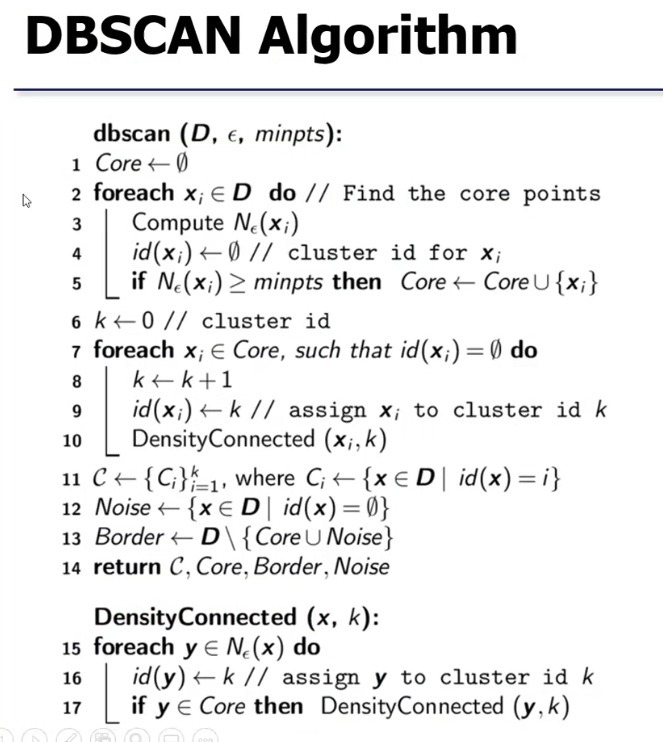


In [1]:
import numpy as np
import queue
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

In [2]:
import numpy as np
from queue import Queue
import matplotlib.pyplot as plt

def Mohey_DBSCAN(data, eps, min_points):
    if type(data) != 'numpy.ndarray':
        data = data.to_numpy()
    Id_label = np.zeros(len(data))
    
    #Find neighborghbors 
    lists_of_neighborghbors = []
    for i in range(len(data)) :
        neighborghbors = []
        for X_i in range(len(data)) :
            if np.linalg.norm(data[X_i] - data[i]) <= eps:
                neighborghbors.append(X_i)  
        lists_of_neighborghbors.append(neighborghbors)
#     print(lists_of_neighborghbors)

    #Core, Border And Noise 
    core = []
    others = []
    for neighborghbor_idx in range(len(lists_of_neighborghbors)) : 
        if len(lists_of_neighborghbors[neighborghbor_idx]) >= min_points :
            Id_label[neighborghbor_idx] = -1 # Core label
            core.append(neighborghbor_idx)
        else:                    
            others.append(neighborghbor_idx)
        #Based on neighborghbours, detecting edges 
    for index in others: 
        for point in lists_of_neighborghbors[index]:
            if point in core:
                Id_label[index] = -2 # Edge Label
                break;
#     print(Id_label)  


    #Getting To cluster the data 
    cluster = 1
    for i in range(len(Id_label)) :
        q = Queue()
        if Id_label[i] == -1: # Core
            Id_label[i] = cluster
            
            #Looping on neighborghbours
            for neighbor in lists_of_neighborghbors[i] :
                if Id_label[neighbor] == -1 : # Core
                    q.put(neighbor)
                    Id_label[neighbor] = cluster
                
                elif Id_label[neighbor] == -2: # Edge
                    Id_label[neighbor] = cluster
            
            # Get neighborghbours of this list 
            while not q.empty():
                neighbors = lists_of_neighborghbors[q.get()]
                
                for neighbor in neighbors :
                    if Id_label[neighbor] == -1 :
                        Id_label[neighbor] = cluster
                        q.put(neighbor)
                        
                    if Id_label[neighbor] == -2:
                        Id_label[neighbor] = cluster
                        
            cluster = cluster + 1 
    
    return Id_label

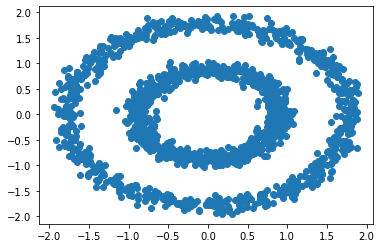

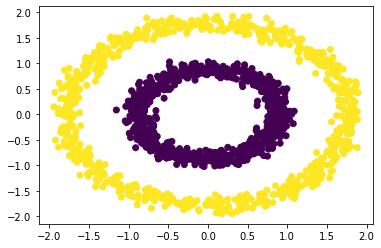

In [3]:
#test Data 
test_data = sklearn.datasets.make_circles(n_samples=1500, factor=.5, noise=.05)[0]
dataset =pd.DataFrame(test_data)
z = StandardScaler()
dataset[["x","y"]] = z.fit_transform(dataset)
#     print(f'dataset{i}')
plt.scatter(data = dataset,x="x",y="y");
plt.show()

labels= Mohey_DBSCAN(dataset, 0.3, 5)
plt.scatter(data = dataset ,x="x",y="y", c=labels);
plt.show()